# Analyzing hex maze data in spyglass

### Step 1. Insert session from an NWB file with hex maze data (trial / block tables)
--> see https://github.com/LorenFrankLab/spyglass/blob/master/notebooks/02_Insert_Data.ipynb for spyglass setup and inserting a session

Here, we confirm that this NWB has the required `block` and `trials` tables stored as TimeIntervals

In [10]:
from pynwb import NWBHDF5IO, NWBFile
import spyglass.common as sgc
from spyglass.common import Nwbfile

# Path to an NWB file already in spyglass 
nwb_file_name = "BraveLu20240519_.nwb"
nwb_file_path = Nwbfile().get_abs_path(nwb_file_name)

# Confirm that behavior data is in this NWB
with NWBHDF5IO(nwb_file_path, 'r') as io:
    nwbfile = io.read()
        
    # Get trial and block data
    block_data = nwbfile.intervals["block"]
    trial_data = nwbfile.intervals["trials"]

    display(block_data)
    display(trial_data)

,start_time,stop_time,epoch,block,maze_configuration,pA,pB,pC,start_trial,end_trial,num_trials,task_type
id,,,,,,,,,,,,
0,1.716147e+09,1.716148e+09,1,1,"9,10,20,21,23,27,35,37,45",10,50,90,1,69,69,probability change
1,1.716148e+09,1.716150e+09,1,2,"9,10,20,21,23,27,35,37,45",90,10,50,70,138,69,probability change
2,1.716150e+09,1.716151e+09,1,3,"9,10,20,21,23,27,35,37,45",10,90,50,139,207,69,probability change
3,1.716154e+09,1.716155e+09,3,1,"9,10,18,19,21,29,37,41,43",90,50,10,1,69,69,probability change


,start_time,stop_time,epoch,block,trial_within_block,trial_within_epoch,start_port,end_port,reward,opto_condition,duration,poke_in,poke_out
id,,,,,,,,,,,,,
0,1.716147e+09,1.716147e+09,1,1,1,1,None,B,1,no_delay,11.215407,1.716147e+09,1.716147e+09
1,1.716147e+09,1.716147e+09,1,1,2,2,B,A,0,None,22.473019,1.716147e+09,1.716147e+09
2,1.716147e+09,1.716148e+09,1,1,3,3,A,B,1,delay,21.164551,1.716148e+09,1.716148e+09
3,1.716148e+09,1.716148e+09,1,1,4,4,B,A,1,delay,21.846852,1.716148e+09,1.716148e+09


### Step 2. Insert session from an NWB file with hex maze data (trial / block tables)

In [ ]:
from hex_maze_behavior import HexMazeConfig, HexMazeBlock
from spyglass.common import Nwbfile

# Name of NWB file to add to block and trial tables
nwb_file_name = "BraveLu20240519_.nwb"

# Insert this session into HexMazeBlock, HexMazeBlock.Trial, and HexMazeConfig table
HexMazeBlock().load_from_nwb(nwb_file_name)

# All you need is this one line!! Wow!!

### Step 3. View the trial and block tables with your session added!

In [16]:
#%load_ext autoreload
#%autoreload 2
from hex_maze_behavior import HexMazeConfig, HexMazeBlock
import spyglass.common as sgc
from spyglass.common import Nwbfile
import spyglass.data_import as sgi

# Show the HexMazeBlock table
print("HexMazeBlock table:")
display(HexMazeBlock())

# Show the Trial part table
print("HexMazeBlock().Trial part table:")
display(HexMazeBlock().Trial())

# Show the HexMazeConfig table
print("HexMazeConfig table:")
display(HexMazeConfig())


HexMazeBlock table:


nwb_file_name name of the NWB file,epoch the session epoch for this task and apparatus(1 based),block the block number within the epoch,config_id maze configuration as a string,p_a probability of reward at port A,p_b probability of reward at port B,p_c probability of reward at port C,num_trials number of trials in this block,"block_interval np.array of [start_time, end_time]",task_type 'barrier shift' or 'probabilty shift'
BraveLu20240519_.nwb,1,1,"9,10,20,21,23,27,35,37,45",10.0,50.0,90.0,69,=BLOB=,probability change
BraveLu20240519_.nwb,1,2,"9,10,20,21,23,27,35,37,45",90.0,10.0,50.0,69,=BLOB=,probability change
BraveLu20240519_.nwb,1,3,"9,10,20,21,23,27,35,37,45",10.0,90.0,50.0,69,=BLOB=,probability change
BraveLu20240519_.nwb,3,1,"9,10,18,19,21,29,37,41,43",90.0,50.0,10.0,69,=BLOB=,probability change
BraveLu20240519_.nwb,3,2,"9,10,18,19,21,29,37,41,43",50.0,10.0,90.0,69,=BLOB=,probability change
BraveLu20240519_.nwb,3,3,"9,10,18,19,21,29,37,41,43",10.0,90.0,50.0,69,=BLOB=,probability change
BraveLu20240519_.nwb,5,1,"9,11,16,21,29,33,37,44,46",50.0,90.0,10.0,42,=BLOB=,barrier change
BraveLu20240519_.nwb,5,2,"9,11,14,21,29,33,37,44,46",50.0,90.0,10.0,65,=BLOB=,barrier change
BraveLu20240519_.nwb,5,3,"9,11,14,20,21,33,37,44,46",50.0,90.0,10.0,32,=BLOB=,barrier change
BraveLu20240519_.nwb,7,1,"7,11,12,20,26,34,36,38,39,41",10.0,50.0,90.0,71,=BLOB=,barrier change


HexMazeBlock().Trial part table:


nwb_file_name name of the NWB file,epoch the session epoch for this task and apparatus(1 based),block the block number within the epoch,block_trial_num trial number within the block,epoch_trial_num trial number within the epoch,reward if the rat got a reward,"start_port A, B, or C","end_port A, B, or C","opto_cond description of opto condition, if any (delay / no_delay)","trial_interval np.array of [start_time, end_time]","poke_interval np.array of [poke_in, poke_out]",duration trial duration in seconds
BraveLu20240519_.nwb,1,1,1,1,1,None,B,no_delay,=BLOB=,=BLOB=,11.2154
BraveLu20240519_.nwb,1,1,2,2,0,B,A,None,=BLOB=,=BLOB=,22.473
BraveLu20240519_.nwb,1,1,3,3,1,A,B,delay,=BLOB=,=BLOB=,21.1646
BraveLu20240519_.nwb,1,1,4,4,1,B,A,delay,=BLOB=,=BLOB=,21.8469
BraveLu20240519_.nwb,1,1,5,5,0,A,B,None,=BLOB=,=BLOB=,7.79641
BraveLu20240519_.nwb,1,1,6,6,0,B,A,None,=BLOB=,=BLOB=,7.17867
BraveLu20240519_.nwb,1,1,7,7,0,A,B,None,=BLOB=,=BLOB=,9.66421
BraveLu20240519_.nwb,1,1,8,8,0,B,A,None,=BLOB=,=BLOB=,7.85081
BraveLu20240519_.nwb,1,1,9,9,1,A,B,delay,=BLOB=,=BLOB=,17.3832
BraveLu20240519_.nwb,1,1,10,10,0,B,A,None,=BLOB=,=BLOB=,8.07304


HexMazeConfig table:


config_id maze configuration as a string,len_ab number of hexes on optimal path between ports A and B,len_bc number of hexes on optimal path between ports B and C,len_ac number of hexes on optimal path between ports A and C,"path_length_diff max path length difference between lenAB, lenBC, lenAC",num_choice_points number of critical choice points for this maze config,num_cycles number of graph cycles (closed loops) for this maze config,choice_points set of hexes that are choice points (not query-able)
"7,11,12,14,20,26,34,36,38,39",19,17,19,2,1,0,=BLOB=
"7,11,12,20,26,34,36,38,39,41",17,23,19,6,1,0,=BLOB=
"7,11,14,20,26,29,34,36,38,39",19,23,15,8,1,0,=BLOB=
"7,11,14,20,29,34,36,38,39,45",15,19,15,4,1,1,=BLOB=
"7,14,20,23,30,37,39,41,46",15,21,17,6,1,0,=BLOB=
"9,10,18,19,21,29,37,41,43",21,19,21,2,1,0,=BLOB=
"9,10,20,21,23,27,35,37,45",17,25,19,8,1,1,=BLOB=
"9,11,14,20,21,33,37,44,46",23,17,17,6,3,3,=BLOB=
"9,11,14,21,29,33,37,44,46",19,21,17,4,3,3,=BLOB=
"9,11,16,21,29,33,37,44,46",15,21,25,10,1,2,=BLOB=


### Step 4: Analyze your data! 

(This one is up to you)

(but you can use the [Hex-maze](https://github.com/calderast/Hex-maze) repo to help!)

(0.0, 3.0)

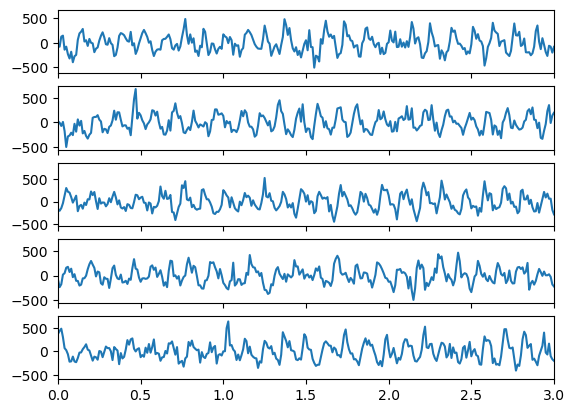

In [27]:
from spyglass.lfp.v1 import LFPV1, LFPSelection
from spyglass.common import interval_list_contains_ind
import matplotlib.pyplot as plt

# Define nwb and epoch of interest
file_name = "BraveLu20240519_.nwb"
key = {"nwb_file_name": file_name, "target_interval_list_name": "03_r2"}

# Get LFP data for this epoch 
lfp_df = (LFPV1() & key).fetch1_dataframe()

# Use Trial table to filter to unrewarded trials only
trial_query = HexMazeBlock().Trial() & key & {"reward": 1, "epoch": 3}
interval_list = trial_query.fetch("trial_interval")

# Plot LFP!
fig, ax_list = plt.subplots(nrows = 5,sharex=True)
for ax, interval in zip(ax_list, interval_list):
    ind = interval_list_contains_ind(interval[None,:], lfp_df.index)
    if ind.size == 0:
        continue
    t = lfp_df.index.values[ind][::10]
    t=t-t[0]
    ax.plot(t, lfp_df[0].values[ind][::10])
    # ax.axvspan(interval[0], interval[1], color='red', alpha=0.5)
plt.xlim(0,3)

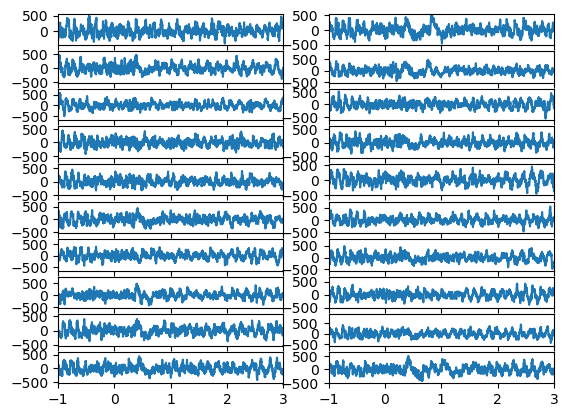

In [29]:
from spyglass.lfp.analysis.v1 import LFPBandV1
import matplotlib.pyplot as plt
import numpy as np

fig, ax_list = plt.subplots(nrows=10, sharex=True, ncols=2)

# lfp_df = (LFPBandV1() & key & {"filter_name":"Ripple 150-250 Hz"}).fetch1_dataframe()
# trial_query1 = HexMazeBlock().Trial() & key & {"reward": 1, "epoch": 5, "opto_cond": "no_delay"}
# trial_query2 = HexMazeBlock().Trial() & key & {"reward": 1, "epoch": 5, "opto_cond": "delay"}

# Plot comparison of LFP under different conditions (Rewarded vs. unrewarded, opto delay vs. no delay)

trial_query1 = (
    HexMazeBlock().Trial()
    & key
    & {"reward": 1, "epoch": 3, "opto_cond": "no_delay"}
)
trial_query2 = (
    HexMazeBlock().Trial()
    & key
    & {"reward": 1, "epoch": 3, "opto_cond": "delay"}
)

for i,trial_query in enumerate([trial_query1, trial_query2]):
    # trial_query
    interval_list = trial_query.fetch("trial_interval")
    interval_list = trial_query.fetch("poke_interval")

    for ax, interval in zip(ax_list[:,i], interval_list):
        ind = interval_list_contains_ind(np.array([[interval[0]-1,interval[0]+10]]), lfp_df.index)
        if ind.size == 0:
            continue
        t = lfp_df.index.values[ind][::1]
        t = t - interval[0]
        ax.plot(t, lfp_df[0].values[ind][::1])
        # ax.axvspan(interval[0], interval[1], color='red', alpha=0.5)
    plt.xlim(-1, 3)

Deleting from tables:

In [8]:
# To delete the entire HexMazeBlock table (and downstream):
#HexMazeBlock().drop()

# To delete a session from the block table (and downstream):
# key = {"nwb_file_name": nwb_file_name}
# (HexMazeBlock() & key).delete()